# GradientBoostingClassifier

In [1]:
from __future__ import division
from IPython.display import display
from matplotlib import pyplot as plt
%matplotlib inline

import numpy  as np
import pandas as pd
import random, sys, os


from sklearn.ensemble         import GradientBoostingClassifier
from sklearn.cross_validation import StratifiedKFold
from sklearn.grid_search      import RandomizedSearchCV, GridSearchCV

In [2]:
SEED   = 97
scale  = False 
minmax = False
norm   = False
nointercept = False
engineering = False

submission_filename = "../submissions/submission_GradientBoostingClassifier.csv"

# Load the training data

In [3]:
from load_blood_data import load_blood_data

y_train, X_train = load_blood_data(train=True, SEED   = SEED, 
                                               scale  = scale,
                                               minmax = minmax,
                                               norm   = norm,
                                               nointercept = nointercept,
                                               engineering = engineering)

In [4]:
%%time

random.seed(SEED)

clf = GradientBoostingClassifier(loss                     = 'deviance', # 'deviance', 'exponential'
                                 learning_rate            = 0.1, 
                                 n_estimators             = 100, 
                                 max_depth                = 1, 
                                 subsample                = 0.5, 
                                 
                                 min_samples_split        = 2, 
                                 min_samples_leaf         = 1, 
                                 #min_weight_fraction_leaf = 0.0, 
                                 init                     = None, 
                                 random_state             = SEED, 
                                 max_features             = None, 
                                 verbose                  = 0, 
                                 max_leaf_nodes           = None, 
                                 warm_start               = False) 
                                 #presort                  = 'auto')



# StatifiedCV = StratifiedKFold(y            = y_train, 
#                               n_folds      = 10, 
#                               shuffle      = True, 
#                               random_state = SEED)

# param_grid = dict(loss          = ['deviance', 'exponential'],
#                   learning_rate = [0.05, 0.10, 0.15, 0.20],
#                   n_estimators  = [125, 150, 175, 200],
#                   max_depth     = [1, 2, 3],
#                   subsample     = [0.20, 0.25, 0.50, 0.75, 1.0])

# grid_clf = GridSearchCV(estimator  = clf, 
#                         param_grid = param_grid,
#                         n_jobs     = -1,  
#                         cv         = StatifiedCV).fit(X_train, y_train)

# print("clf_params = {}".format(grid_clf.best_params_))
# print("score: {}".format(grid_clf.best_score_))

# clf = grid_clf.best_estimator_




# clf_params = {'n_estimators': 150, 'loss': 'deviance',    'learning_rate': 0.1,  'max_depth': 1, 'subsample': 0.25}
clf_params = {'n_estimators': 175, 'loss': 'exponential', 'learning_rate': 0.15, 'max_depth': 1, 'subsample': 0.75}
clf.set_params(**clf_params)
clf.fit(X_train, y_train)

CPU times: user 80 ms, sys: 4 ms, total: 84 ms
Wall time: 82.3 ms


In [5]:
# from sklearn_utilities import GridSearchHeatmap

# GridSearchHeatmap(grid_clf, y_key='learning_rate', x_key='n_estimators')

# from sklearn_utilities import plot_validation_curves

# plot_validation_curves(grid_clf, param_grid, X_train, y_train, ylim = (0.0, 1.05))

/home/george/.local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


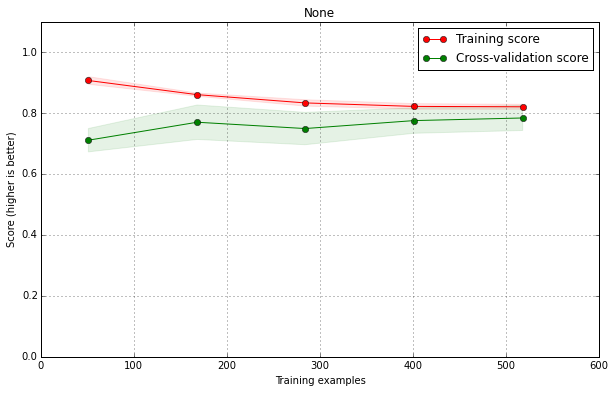

CPU times: user 256 ms, sys: 40 ms, total: 296 ms
Wall time: 886 ms


In [6]:
%%time

try:
    from sklearn_utilities import plot_learning_curve
except:
    import imp, os
    util = imp.load_source('sklearn_utilities', os.path.expanduser('~/Dropbox/Python/sklearn_utilities.py'))
    from sklearn_utilities import plot_learning_curve

plot_learning_curve(estimator   = clf, 
                    title       = None, 
                    X           = X_train, 
                    y           = y_train, 
                    ylim        = (0.0, 1.10), 
                    cv          = 10, 
                    train_sizes = np.linspace(.1, 1.0, 5),
                    n_jobs      = -1)

plt.show()

# Training set predictions

In [7]:
predicted_values = clf.predict(X_train)
y_true, y_pred   = y_train, predicted_values

predicted_probs  = clf.predict_proba(X_train)

[[417  21]
 [ 84  54]]


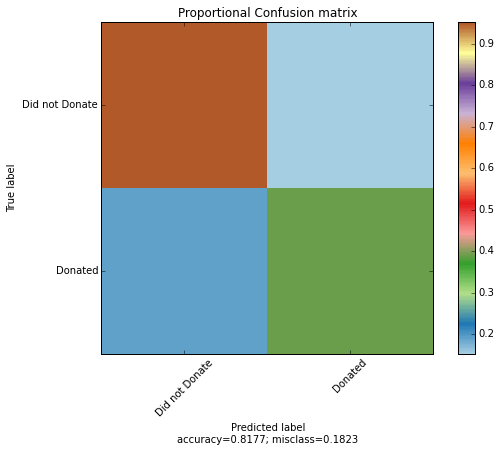

Accuracy 0.8177, mis-class rate 0.1823


In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_pred, labels=None)
print cm

try:
    from sklearn_utilities import plot_confusion_matrix
except:
    import imp, os
    util = imp.load_source('sklearn_utilities', os.path.expanduser('~/Dropbox/Python/sklearn_utilities.py'))
    from sklearn_utilities import plot_confusion_matrix

plot_confusion_matrix(cm, ['Did not Donate','Donated'])

accuracy = round(np.trace(cm)/float(np.sum(cm)),4)
misclass = 1 - accuracy
print("Accuracy {}, mis-class rate {}".format(accuracy,misclass))

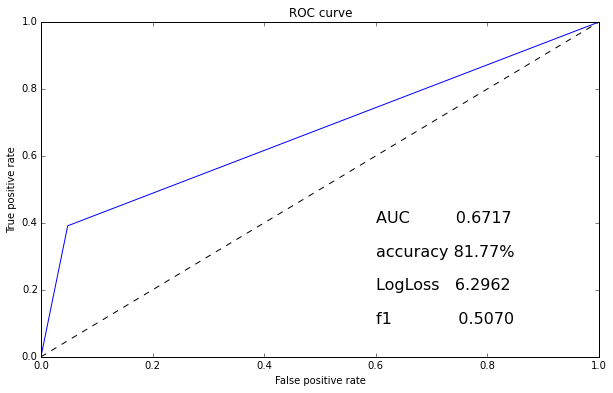

In [10]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import f1_score

fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label=None)


plt.figure(figsize=(10,6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)

plt.text(x=0.6,y=0.4,s="AUC         {:.4f}"\
         .format(roc_auc_score(y_true, y_pred, average='macro')),
        fontsize=16)

plt.text(x=0.6,y=0.3,s="accuracy {:.2f}%"\
         .format(accuracy*100),
        fontsize=16)

plt.text(x=0.6,y=0.2,s="LogLoss   {:.4f}"\
         .format(log_loss(y_true, y_pred)),
        fontsize=16)

plt.text(x=0.6,y=0.1,s="f1             {:.4f}"\
         .format(f1_score(y_true, y_pred)),
        fontsize=16)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.show()

# --------------------------------------------------------------------------------------------

# Test Set Predictions

## Load the test data

In [36]:
from load_blood_data import load_blood_data

X_test, IDs = load_blood_data(train=False, SEED   = SEED, 
                                           scale  = scale,
                                           minmax = minmax,
                                           norm   = norm,
                                           nointercept = nointercept,
                                           engineering = engineering)

# Predict the test set with the fitted model

In [37]:
y_pred        = clf.predict(X_test)
y_pred_probs  = clf.predict_proba(X_test)
donate_probs  = [prob[1] for prob in y_pred_probs]

In [38]:
print(y_pred[:5])
print(y_pred_probs[:5])
print(donate_probs[:5])

[0 0 0 0 1]
[[ 0.61482901  0.38517099]
 [ 0.67915069  0.32084931]
 [ 0.82381979  0.17618021]
 [ 0.69091754  0.30908246]
 [ 0.43567332  0.56432668]]
[0.38517099003845223, 0.32084931095829788, 0.17618020619267247, 0.30908245747702279, 0.56432668231548511]


# Create the submission file

In [39]:
assert len(IDs)==len(donate_probs)

f = open(submission_filename, "w")

f.write(",Made Donation in March 2007\n")
for ID, prob in zip(IDs, donate_probs):
    f.write("{},{}\n".format(ID,prob))
    
f.close()